# Modeling Economic Growth: Singapore’s Insights for Kenya

# Business Understanding



## Problem Statement


---


Singapore and Kenya both gained independence in the early 1960s, with GDPs of USD917.2 million and  USD926.6 million respectively—virtually on par at the time. However, today Singapore’s economy outpaces Kenya’s by more than fivefold, despite its smaller land mass, limited natural resources, and a smaller population. This stark divergence in economic outcomes raises critical questions about the strategic choices that have driven Singapore’s rapid transformation into a global financial and trade hub.


The objective of this project is to model the factors behind Singapore’s economic trajectory and recommend policies for Kenya using the production approach focusing on the various best performing industries. Through advanced modeling, the project will identify which policy levers have historically produced the most impact on GDP growth and how these can be adapted for Kenya’s context.


## Overview
This project aims to analyze the economic strategies and industrial policies that propelled Singapore's extraordinary growth, using a production-based modeling approach. The goal is to derive actionable insights and formulate policy recommendations that Kenya can implement to catalyze sustainable economic development.s


---


### Key Features

---
1. Dataset: Singapore's GDP Production & Debt Data, Labour Productivity, Literacy, Economic Reforms, Foreign Direct Investment
2. Core method: Time Series Modeling, Clustering, Multi-linear Regression
3. Evaluation Metrics: RMSE, MSE and Adjusted R-squared.


## Objectives



---



1. **Analyze Sectoral Contributions to GDP in Singapore and Kenya**
Examine historical GDP data by sector to identify which industries have driven growth in each country since independence.

2. **Model the Relationship Between Economic Inputs and Output**
Use a production function to estimate how capital, labor, and productivity  have contributed to GDP in Singapore, and simulate potential outcomes if similar input structures were adopted in Kenya.

3. **Identify High-Impact Policies Behind Singapore’s Economic Transformation**
Link sectoral growth with specific policy interventions to determine which policies had the most influence on growth.

4. **Formulate Adaptable Policy Recommendations for Kenya**
Propose context-specific, evidence-based policy strategies that Kenya can adopt to replicate Singapore’s growth in key industries, accounting for current economic, institutional, and demographic conditions.

## Success criteria

1. Model Performance:

2.

3.


# Data understanding
The data seems to have been split between train and test data

In [72]:
#importing libraries to support in data understanding and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight




warnings.filterwarnings('ignore')

In [89]:
# importing the files
df_gdp_prod_S= pd.read_excel('GDP Production Approach.xlsx')
df_gdp_prod_S

,Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale Trade,Retail Trade,...,Administrative & Support Services,Other Services Industries,Public Administration & Defence,Education,Health & Social Services,"Arts, Entertainment & Recreation",Other Services - Others,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
0,1960,2157.4,432.8,228.2,67.7,57.0,79.9,1538.7,na,na,...,na,330.8,na,na,na,na,na,68.9,2040.4,117.0
1,1961,2340.7,476.9,241.1,93.6,60.0,82.2,1671.4,na,na,...,na,359.1,na,na,na,na,na,73.6,2221.9,118.8
2,1962,2529.3,535.8,271.4,104.4,69.2,90.8,1792.1,na,na,...,na,383.1,na,na,na,na,na,76.3,2404.2,125.1
3,1963,2809.0,618.8,328.5,127.6,71.4,91.3,1984.1,na,na,...,na,424.0,na,na,na,na,na,78.8,2681.7,127.3
4,1964,2737.2,672.9,350.7,150.5,80.5,91.2,1848.9,na,na,...,na,437.7,na,na,na,na,na,80.9,2602.7,134.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,481758.8,112126.9,94684.8,11025.2,6258.8,158.1,328578.4,83535.8,6049.7,...,18129.6,48576.5,13029.7,14289.2,12464.4,3172.5,5620.7,18782.7,459488.0,22270.8
61,2021,586553.1,144553.8,121023.9,16988.2,6362.5,179.2,392669.9,106872.6,6924.6,...,16610.3,52662.0,14343.1,15303.1,13807.8,3447.5,5760.5,18913.4,556137.1,30416.0
62,2022,701766.1,167487.0,137935.9,21161.8,8207.0,182.3,481975.1,141345.1,7929.1,...,18478.9,56881.3,15235.7,15670.6,14882.8,4782.5,6309.7,20499.3,669961.4,31804.7
63,2023,678687.5,150497.9,115211.0,24025.4,11065.7,195.8,468065.8,133756.5,8351.8,...,17627.2,61952.4,15848.9,16444.5,16533.7,6001.4,7123.9,25277.0,643840.7,34846.8


In [105]:
# importing the files
df_gdp_prod_K= pd.read_excel('Gross Domestic Product KENYA.xlsx')
df_gdp_prod_K

,Industry,GDP at market prices,All economic activities,"Agriculture, forestry and fishing",Growing of crops,Animal production,Support activities to agriculture,Forestry & logging,Fishing & aquaculture,Mining and quarrying,...,Education,Pre-primary and Primary education,General secondary education,Higher and other education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers;,Financial Intermediation Services Indirectly Measured (FISIM),Taxes on products
0,2018,9340307,8531502,1897475,1356544,341275,22643,125979,51034,68909,...,399515,208393,109878,81245,188778,24541,135539,65710,-215414,808805
1,2019,10237727,9371398,2135709,1542584,354712,24236,156606,57572,72769,...,431876,215329,119592,96955,197969,27056,144894,68917,-226631,866330
2,2020,10715070,9862147,2432613,1786518,384578,25385,172958,63175,76402,...,413090,209929,110010,93151,212966,19941,124379,72064,-218639,852923
3,2021,12027662,11031456,2583190,1844730,431700,27022,199012,80726,92045,...,521945,257440,146660,117846,238544,23511,143824,75242,-244592,996206
4,2022,13368340,12285427,2829505,2036197,463869,27023,218098,84318,120300,...,542704,269179,153432,120093,244335,28078,155623,79420,-264781,1082913


In [90]:
#checking all necessary info related to the dataframe
df_gdp_prod_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Series                              65 non-null     int64  
 1   GDP At Current Market Prices             65 non-null     float64
 2     Goods Producing Industries             65 non-null     float64
 3       Manufacturing                        65 non-null     float64
 4       Construction                         65 non-null     float64
 5       Utilities                            65 non-null     float64
 6       Other Goods Industries               65 non-null     float64
 7     Services Producing Industries          65 non-null     float64
 8         Wholesale Trade                    65 non-null     object 
 9         Retail Trade                       65 non-null     object 
 10      Transportation & Storage             65 non-null

In [91]:
#summary statistics
df_gdp_prod_S.describe()

,Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,1992.00000,172668.272308,45311.713846,35322.183077,7253.435385,2543.944615,192.150769,111907.290769,14090.150769,3384.104615,7201.378462,20081.896923,16887.796923,6276.766154,163495.770769,9172.501538
std,18.90767,199915.770062,46746.843118,37463.805772,7157.322259,2634.345457,97.662525,135708.044460,16168.661149,3233.693781,9988.577413,25242.547788,19263.853833,7450.016740,189325.105525,10680.885915
min,1960.00000,2157.400000,432.800000,228.200000,67.700000,57.000000,79.900000,1538.700000,256.300000,81.500000,50.300000,71.900000,330.800000,68.900000,2040.400000,117.000000
25%,1976.00000,15003.400000,5104.000000,3313.100000,1084.100000,315.000000,118.200000,9001.200000,1516.800000,508.700000,303.800000,1089.200000,1483.300000,362.100000,14467.300000,536.100000
50%,1992.00000,84920.200000,27585.900000,20677.800000,5315.400000,1425.100000,162.700000,50137.000000,8741.700000,2631.800000,2533.400000,10024.700000,7947.200000,2905.600000,80628.500000,4291.700000
75%,2008.00000,273941.600000,76407.500000,62766.300000,11025.200000,3998.700000,222.800000,177067.300000,22159.200000,4970.700000,9765.600000,30190.000000,25945.800000,10166.200000,259709.600000,14232.000000
max,2024.00000,731436.100000,167487.000000,137935.900000,26063.800000,11065.700000,456.500000,505719.800000,80740.300000,11048.000000,41307.000000,99026.800000,66368.700000,28441.000000,690722.900000,40713.200000


#Data Cleaning

Correcting Data Formats

Handling null values

Dropping duplicates

Display and Clean Outliers



In [92]:
#correcting data formats
for col in df_gdp_prod.columns:
    df_gdp_prod_S[col] = pd.to_numeric(df_gdp_prod_S[col], errors='coerce')

df_gdp_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Series                              65 non-null     int64  
 1   GDP At Current Market Prices             65 non-null     float64
 2     Goods Producing Industries             65 non-null     float64
 3       Manufacturing                        65 non-null     float64
 4       Construction                         65 non-null     float64
 5       Utilities                            65 non-null     float64
 6       Other Goods Industries               65 non-null     float64
 7     Services Producing Industries          65 non-null     float64
 8         Wholesale Trade                    20 non-null     float64
 9         Retail Trade                       20 non-null     float64
 10      Transportation & Storage             65 non-null

In [93]:
# checking for missing values
df_gdp_prod_S.isna().sum()

,0
Data Series,0
GDP At Current Market Prices,0
Goods Producing Industries,0
Manufacturing,0
Construction,0
Utilities,0
Other Goods Industries,0
Services Producing Industries,0
Wholesale Trade,45
Retail Trade,45


Multiple missing data on some sectors

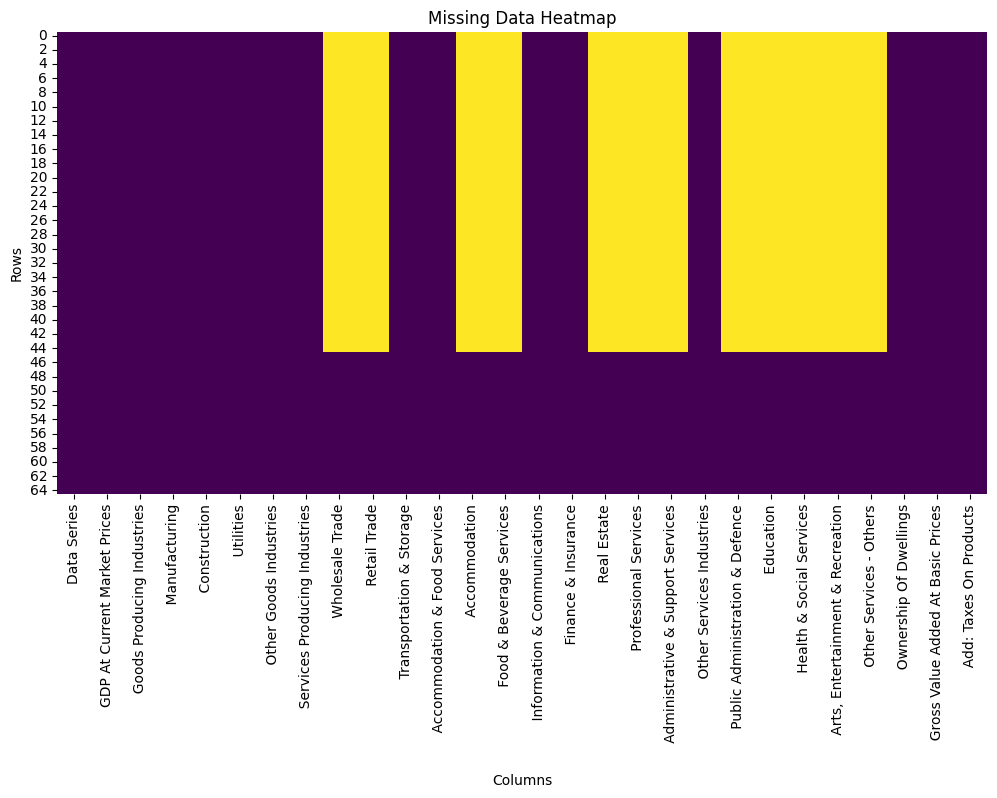

In [94]:
#plotting missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_gdp_prod_S.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [95]:
#Backfilling of columns
cols_to_backfill = df_gdp_prod_S.columns[df_gdp_prod_S.isna().any()].tolist()
df_gdp_prod_bfill = df_gdp_prod_S.copy()
df_gdp_prod_bfill[cols_to_backfill] = df_gdp_prod_S[cols_to_backfill].fillna(method='bfill')
df_gdp_prod_bfill.head()

,Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale Trade,Retail Trade,...,Administrative & Support Services,Other Services Industries,Public Administration & Defence,Education,Health & Social Services,"Arts, Entertainment & Recreation",Other Services - Others,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
0,1960,2157.4,432.8,228.2,67.7,57.0,79.9,1538.7,30070.2,4585.3,...,4770.0,330.8,5440.4,6314.4,4183.2,1674.7,3205.6,68.9,2040.4,117.0
1,1961,2340.7,476.9,241.1,93.6,60.0,82.2,1671.4,30070.2,4585.3,...,4770.0,359.1,5440.4,6314.4,4183.2,1674.7,3205.6,73.6,2221.9,118.8
2,1962,2529.3,535.8,271.4,104.4,69.2,90.8,1792.1,30070.2,4585.3,...,4770.0,383.1,5440.4,6314.4,4183.2,1674.7,3205.6,76.3,2404.2,125.1
3,1963,2809.0,618.8,328.5,127.6,71.4,91.3,1984.1,30070.2,4585.3,...,4770.0,424.0,5440.4,6314.4,4183.2,1674.7,3205.6,78.8,2681.7,127.3
4,1964,2737.2,672.9,350.7,150.5,80.5,91.2,1848.9,30070.2,4585.3,...,4770.0,437.7,5440.4,6314.4,4183.2,1674.7,3205.6,80.9,2602.7,134.5


In [96]:
# checking duplicates
df_gdp_prod_bfill.duplicated().sum()

np.int64(0)

In [97]:
df_gdp_prod_bfill.columns = df_gdp_prod_bfill.columns.str.strip()
df_gdp_prod_bfill.columns

Index(['Data Series', 'GDP At Current Market Prices',
       'Goods Producing Industries', 'Manufacturing', 'Construction',
       'Utilities', 'Other Goods Industries', 'Services Producing Industries',
       'Wholesale Trade', 'Retail Trade', 'Transportation & Storage',
       'Accommodation & Food Services', 'Accommodation',
       'Food & Beverage Services', 'Information & Communications',
       'Finance & Insurance', 'Real Estate', 'Professional Services',
       'Administrative & Support Services', 'Other Services Industries',
       'Public Administration & Defence', 'Education',
       'Health & Social Services', 'Arts, Entertainment & Recreation',
       'Other Services - Others', 'Ownership Of Dwellings',
       'Gross Value Added At Basic Prices', 'Add: Taxes On Products'],
      dtype='object')

In [98]:
columns_to_drop = ['GDP At Current Market Prices','Goods Producing Industries' ,'Services Producing Industries',
                   'Ownership Of Dwellings', 'Gross Value Added At Basic Prices']
df_gdp_prod_industry = df_gdp_prod_bfill.drop(columns=columns_to_drop, errors='ignore')
df_gdp_prod_industry.head()

,Data Series,Manufacturing,Construction,Utilities,Other Goods Industries,Wholesale Trade,Retail Trade,Transportation & Storage,Accommodation & Food Services,Accommodation,...,Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Public Administration & Defence,Education,Health & Social Services,"Arts, Entertainment & Recreation",Other Services - Others,Add: Taxes On Products
0,1960,228.2,67.7,57.0,79.9,30070.2,4585.3,256.3,81.5,1500.4,...,6728.7,10516.1,4770.0,330.8,5440.4,6314.4,4183.2,1674.7,3205.6,117.0
1,1961,241.1,93.6,60.0,82.2,30070.2,4585.3,272.8,86.5,1500.4,...,6728.7,10516.1,4770.0,359.1,5440.4,6314.4,4183.2,1674.7,3205.6,118.8
2,1962,271.4,104.4,69.2,90.8,30070.2,4585.3,280.4,91.1,1500.4,...,6728.7,10516.1,4770.0,383.1,5440.4,6314.4,4183.2,1674.7,3205.6,125.1
3,1963,328.5,127.6,71.4,91.3,30070.2,4585.3,286.7,97.1,1500.4,...,6728.7,10516.1,4770.0,424.0,5440.4,6314.4,4183.2,1674.7,3205.6,127.3
4,1964,350.7,150.5,80.5,91.2,30070.2,4585.3,269.7,100.8,1500.4,...,6728.7,10516.1,4770.0,437.7,5440.4,6314.4,4183.2,1674.7,3205.6,134.5


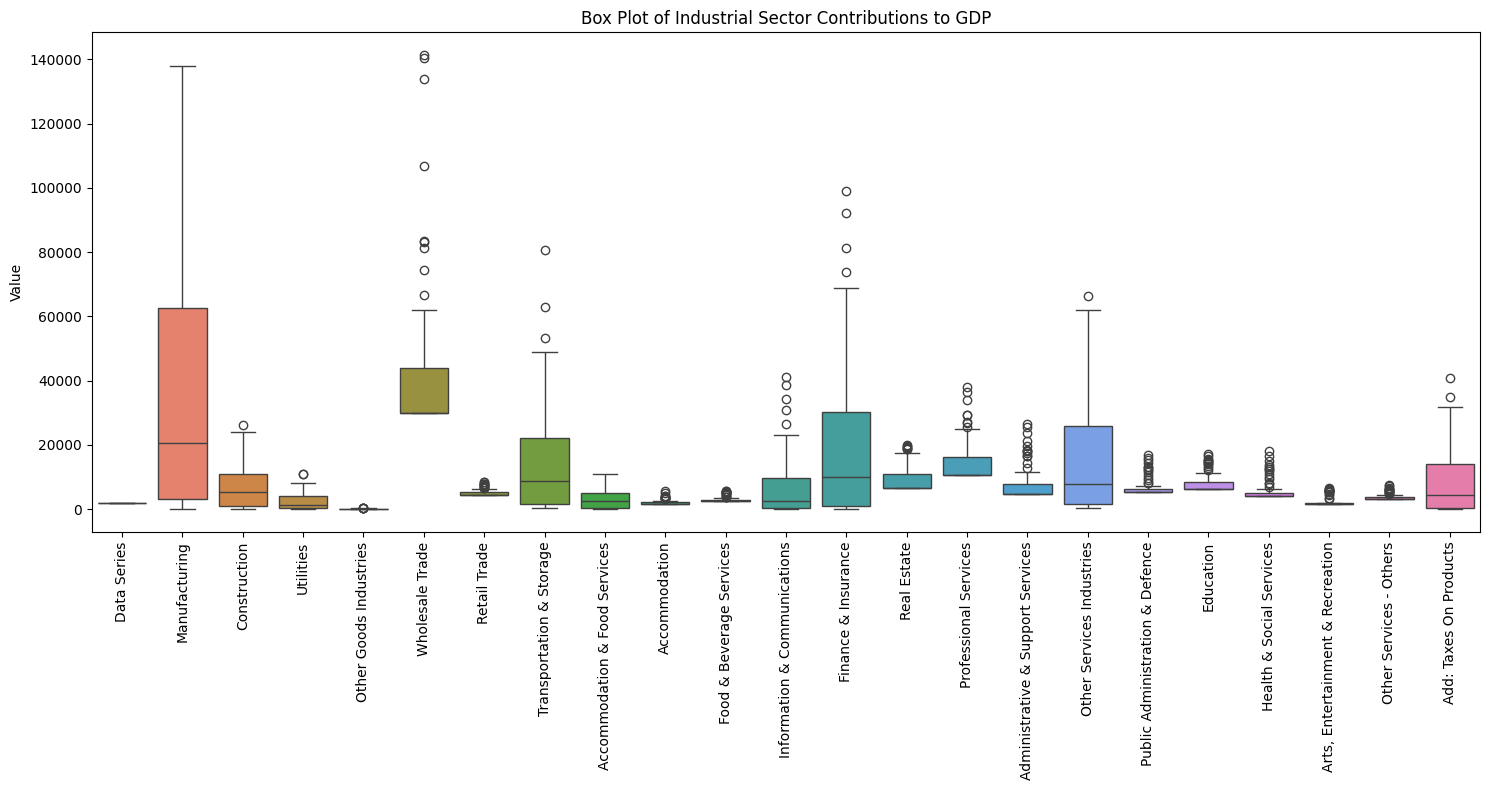

In [99]:
# prompt: generate a simple code for plotting outliers from df_gdp_prod_industry into one box plot

# Select only numerical columns for outlier detection
df_gdp_prod_industry_numeric = df_gdp_prod_industry.select_dtypes(include=np.number)

# Plotting outliers from df_gdp_prod_industry into one box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_gdp_prod_industry_numeric)
plt.title('Box Plot of Industrial Sector Contributions to GDP')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


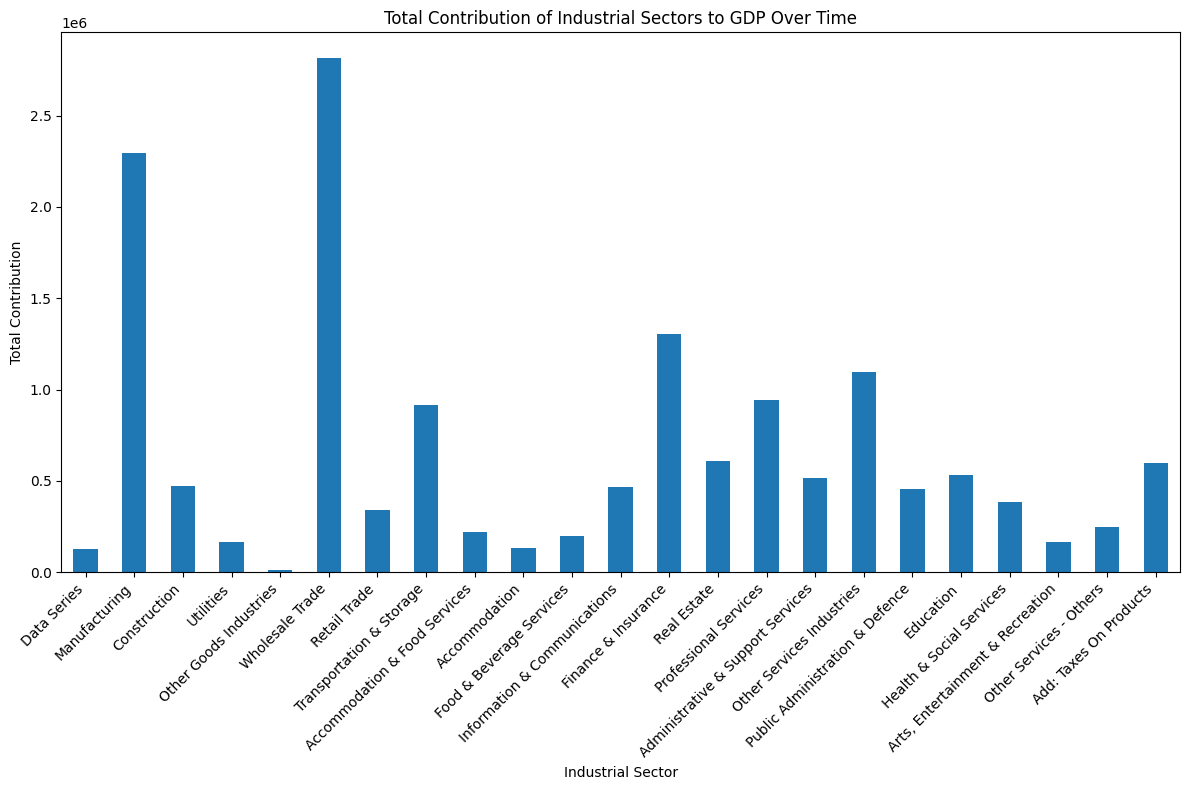

In [100]:
# prompt: generate a simple code for plotting df_gdp_prod_industry into one bar graph

# Select only numerical columns for plotting
df_gdp_prod_industry_numeric = df_gdp_prod_industry.select_dtypes(include=np.number)

# Calculate the sum of contributions for each industry over the years
industry_sums = df_gdp_prod_industry_numeric.sum()

# Plot the sums as a bar chart
plt.figure(figsize=(12, 8))
industry_sums.plot(kind='bar')
plt.title('Total Contribution of Industrial Sectors to GDP Over Time')
plt.xlabel('Industrial Sector')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1. Manufacturing
2. Wholesale Trade
3. Finance and Insurance
4. Professional services
5. Transportation and Storage

In [101]:
df_gdp_prod_filled = df_gdp_prod.fillna(0)
df_gdp_prod_filled.head()

,Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale Trade,Retail Trade,...,Administrative & Support Services,Other Services Industries,Public Administration & Defence,Education,Health & Social Services,"Arts, Entertainment & Recreation",Other Services - Others,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
0,1960,2157.4,432.8,228.2,67.7,57.0,79.9,1538.7,0.0,0.0,...,0.0,330.8,0.0,0.0,0.0,0.0,0.0,68.9,2040.4,117.0
1,1961,2340.7,476.9,241.1,93.6,60.0,82.2,1671.4,0.0,0.0,...,0.0,359.1,0.0,0.0,0.0,0.0,0.0,73.6,2221.9,118.8
2,1962,2529.3,535.8,271.4,104.4,69.2,90.8,1792.1,0.0,0.0,...,0.0,383.1,0.0,0.0,0.0,0.0,0.0,76.3,2404.2,125.1
3,1963,2809.0,618.8,328.5,127.6,71.4,91.3,1984.1,0.0,0.0,...,0.0,424.0,0.0,0.0,0.0,0.0,0.0,78.8,2681.7,127.3
4,1964,2737.2,672.9,350.7,150.5,80.5,91.2,1848.9,0.0,0.0,...,0.0,437.7,0.0,0.0,0.0,0.0,0.0,80.9,2602.7,134.5


In [102]:
df_gdp_prod_filled.columns = df_gdp_prod_filled.columns.str.strip()
df_gdp_prod_filled.columns

Index(['Data Series', 'GDP At Current Market Prices',
       'Goods Producing Industries', 'Manufacturing', 'Construction',
       'Utilities', 'Other Goods Industries', 'Services Producing Industries',
       'Wholesale Trade', 'Retail Trade', 'Transportation & Storage',
       'Accommodation & Food Services', 'Accommodation',
       'Food & Beverage Services', 'Information & Communications',
       'Finance & Insurance', 'Real Estate', 'Professional Services',
       'Administrative & Support Services', 'Other Services Industries',
       'Public Administration & Defence', 'Education',
       'Health & Social Services', 'Arts, Entertainment & Recreation',
       'Other Services - Others', 'Ownership Of Dwellings',
       'Gross Value Added At Basic Prices', 'Add: Taxes On Products'],
      dtype='object')

In [103]:
columns_to_drop = ['GDP At Current Market Prices','Goods Producing Industries' ,'Services Producing Industries',
                   'Ownership Of Dwellings', 'Gross Value Added At Basic Prices']
df_gdp_prod_industry_2 = df_gdp_prod_filled.drop(columns=columns_to_drop, errors='ignore')
df_gdp_prod_industry_2.head()

,Data Series,Manufacturing,Construction,Utilities,Other Goods Industries,Wholesale Trade,Retail Trade,Transportation & Storage,Accommodation & Food Services,Accommodation,...,Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Public Administration & Defence,Education,Health & Social Services,"Arts, Entertainment & Recreation",Other Services - Others,Add: Taxes On Products
0,1960,228.2,67.7,57.0,79.9,0.0,0.0,256.3,81.5,0.0,...,0.0,0.0,0.0,330.8,0.0,0.0,0.0,0.0,0.0,117.0
1,1961,241.1,93.6,60.0,82.2,0.0,0.0,272.8,86.5,0.0,...,0.0,0.0,0.0,359.1,0.0,0.0,0.0,0.0,0.0,118.8
2,1962,271.4,104.4,69.2,90.8,0.0,0.0,280.4,91.1,0.0,...,0.0,0.0,0.0,383.1,0.0,0.0,0.0,0.0,0.0,125.1
3,1963,328.5,127.6,71.4,91.3,0.0,0.0,286.7,97.1,0.0,...,0.0,0.0,0.0,424.0,0.0,0.0,0.0,0.0,0.0,127.3
4,1964,350.7,150.5,80.5,91.2,0.0,0.0,269.7,100.8,0.0,...,0.0,0.0,0.0,437.7,0.0,0.0,0.0,0.0,0.0,134.5


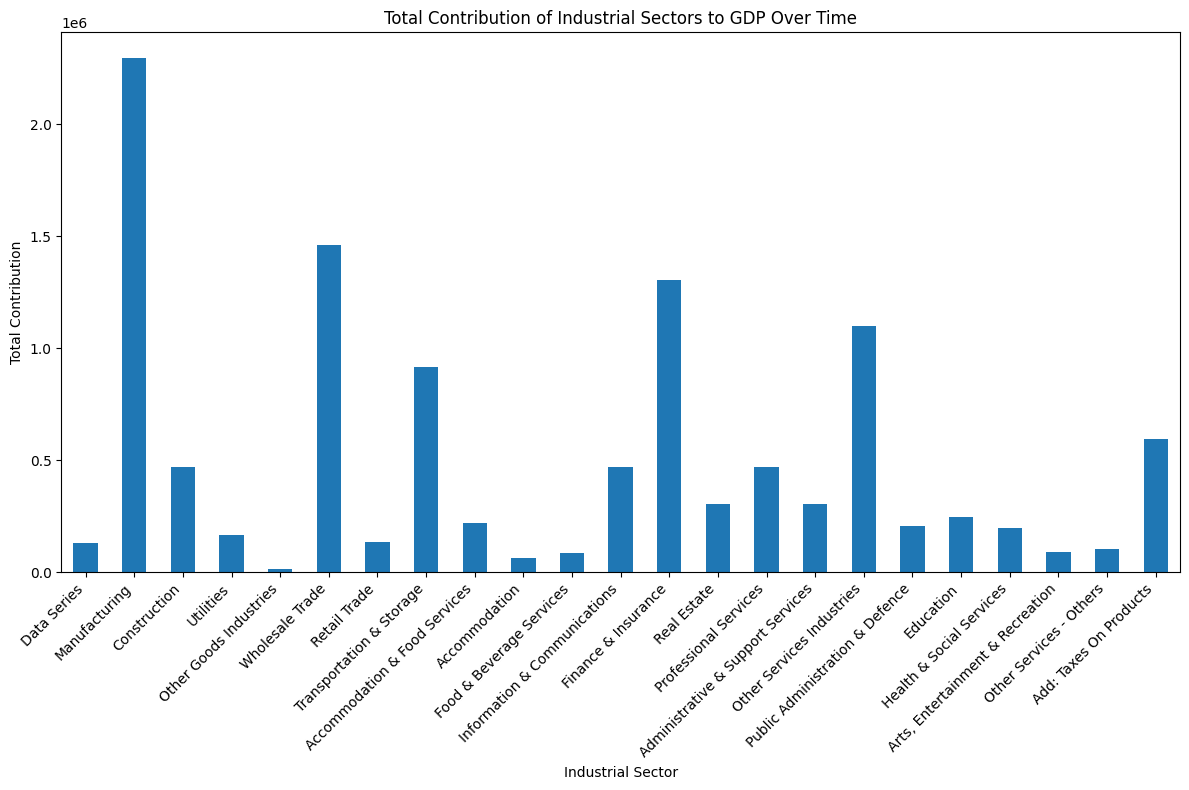

In [104]:
df_gdp_prod_industry_numeric = df_gdp_prod_industry_2.select_dtypes(include=np.number)

# Calculate the sum of contributions for each industry over the years
industry_sums = df_gdp_prod_industry_numeric.sum()

# Plot the sums as a bar chart
plt.figure(figsize=(12, 8))
industry_sums.plot(kind='bar')
plt.title('Total Contribution of Industrial Sectors to GDP Over Time')
plt.xlabel('Industrial Sector')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [107]:
columns_to_drop = ['GDP at market prices','All economic activities']
df_gdp_prod_industry_K = df_gdp_prod_K.drop(columns=columns_to_drop, errors='ignore')
df_gdp_prod_industry_K.head()

,Industry,"Agriculture, forestry and fishing",Growing of crops,Animal production,Support activities to agriculture,Forestry & logging,Fishing & aquaculture,Mining and quarrying,Manufacturing,"Manufacture of food, beverages and tobacco",...,Education,Pre-primary and Primary education,General secondary education,Higher and other education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers;,Financial Intermediation Services Indirectly Measured (FISIM),Taxes on products
0,2018,1897475,1356544,341275,22643,125979,51034,68909,785369,452182,...,399515,208393,109878,81245,188778,24541,135539,65710,-215414,808805
1,2019,2135709,1542584,354712,24236,156606,57572,72769,809253,467200,...,431876,215329,119592,96955,197969,27056,144894,68917,-226631,866330
2,2020,2432613,1786518,384578,25385,172958,63175,76402,814328,467412,...,413090,209929,110010,93151,212966,19941,124379,72064,-218639,852923
3,2021,2583190,1844730,431700,27022,199012,80726,92045,885633,499252,...,521945,257440,146660,117846,238544,23511,143824,75242,-244592,996206
4,2022,2829505,2036197,463869,27023,218098,84318,120300,1046289,575130,...,542704,269179,153432,120093,244335,28078,155623,79420,-264781,1082913


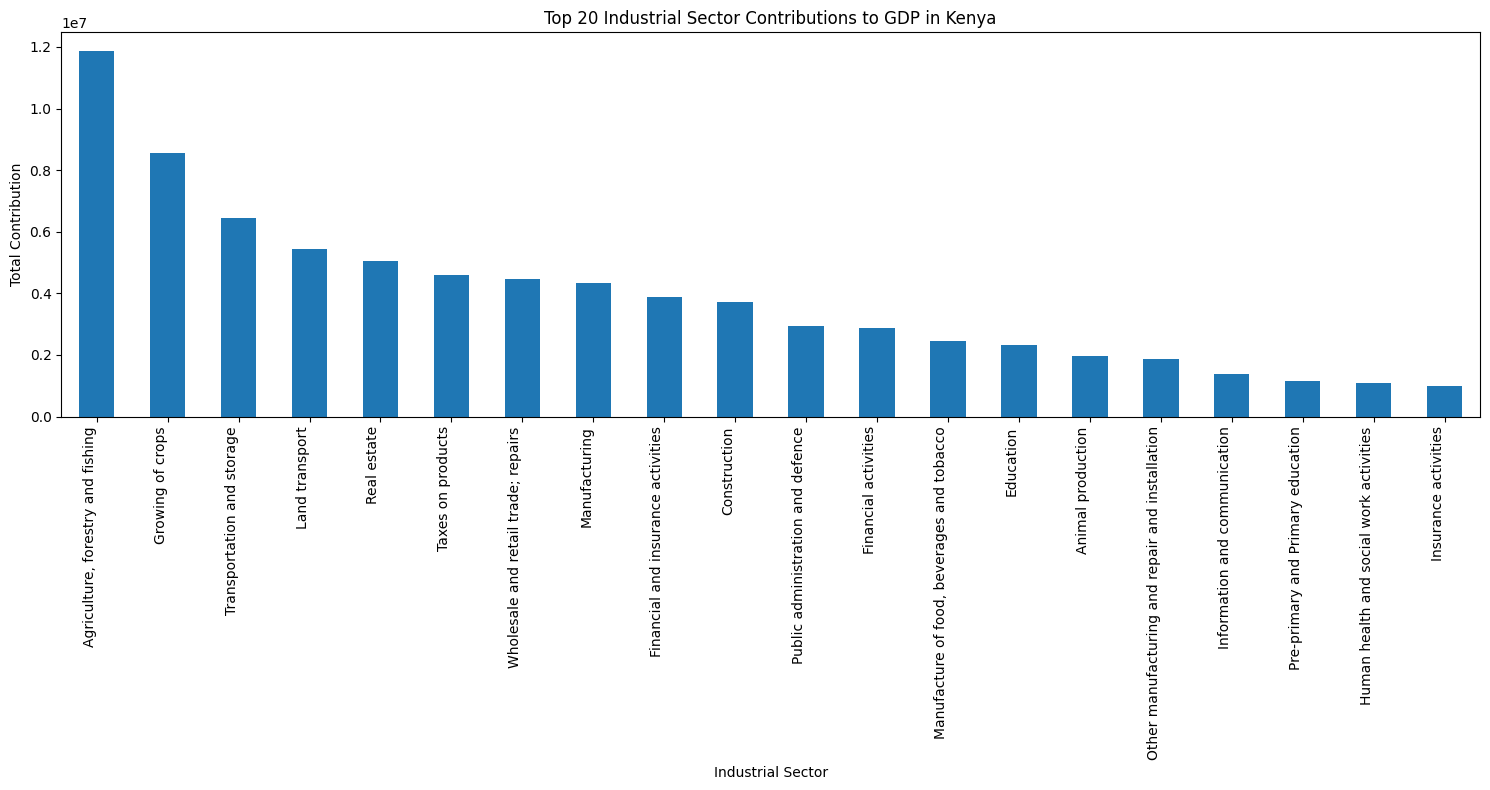

In [110]:
# prompt: plot bar graph of df_gdp_prod_industry_K top 20

# Select only numerical columns for plotting
df_gdp_prod_industry_K_numeric = df_gdp_prod_industry_K.select_dtypes(include=np.number)
# Sum up the contribution of each industry
industry_sums_K = df_gdp_prod_industry_K_numeric.sum()
# Sort the industries by their total contribution and select the top 20
top_20_industries_K = industry_sums_K.sort_values(ascending=False).head(20)
# Plot the top 20 industries as a bar chart
plt.figure(figsize=(15, 8))
top_20_industries_K.plot(kind='bar')
plt.title('Top 20 Industrial Sector Contributions to GDP in Kenya')
plt.xlabel('Industrial Sector')
plt.ylabel('Total Contribution')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

1. Agriculture
2. Transportation and Storage
3. Real Estate
4. Taxes on products
5. Wholesale and retail Trade
6. Manufacturing
7. Financial and Insurance activities

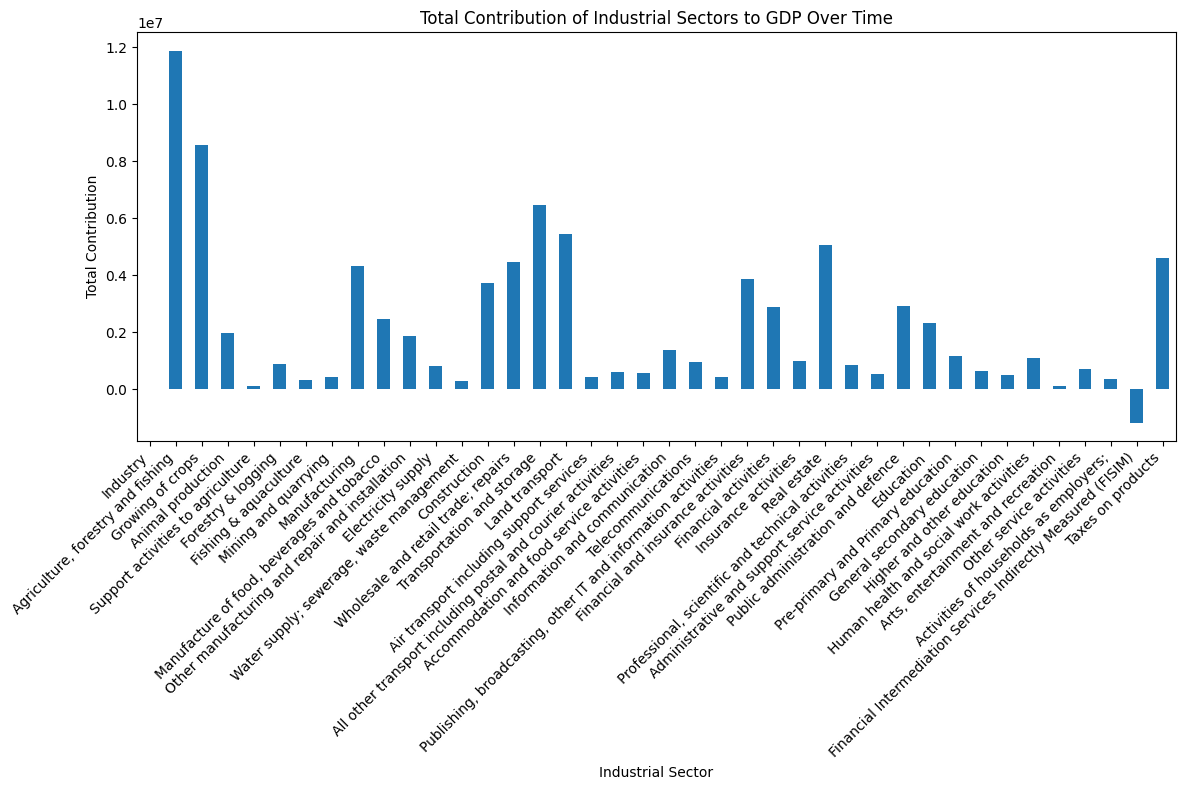

In [108]:
df_gdp_prod_industry_numeric = df_gdp_prod_industry_K.select_dtypes(include=np.number)

# Calculate the sum of contributions for each industry over the years
industry_sums = df_gdp_prod_industry_numeric.sum()

# Plot the sums as a bar chart
plt.figure(figsize=(12, 8))
industry_sums.plot(kind='bar')
plt.title('Total Contribution of Industrial Sectors to GDP Over Time')
plt.xlabel('Industrial Sector')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Manufacturing
2. Wholesale Trade
3. Finance and Insurance
4. Other Service Industries
5. Transportation and Storage
6. Taxes on Products

Datasets to be used

1. Income of FDI to sector - identify policies tied to it
2. Net Foreign exchange from exports per industry - policy
3. Debt -Kenya and Singapore - explore
4. Impact of education and Literacy to Industry
5. Impact of productivity on industry
6.


#Exploratory Data Analysis

## univariate analysis


# Bivariate analysis

## Mutivariate Analysis


# Preprocessing

#Modeling

### Evaluation

## Summary

## Limitations and Future Recommendations